### Necessary Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import copy
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import balanced_accuracy_score, accuracy_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import f1_score
from sklearn import linear_model
from sklearn.ensemble import VotingRegressor
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn import metrics

## Data Loading and inspection

In [244]:
RegressionData=pd.read_csv('train-data.csv')
print ("Shape of Training Data is : ", RegressionData.shape)
Test_Data = pd.read_csv('test-data.csv')
print ("Shape of Testing Data is : ", Test_Data.shape)

Shape of Training Data is :  (6019, 14)
Shape of Testing Data is :  (1234, 13)


In [245]:
RegressionData.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [246]:
Test_Data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [247]:
RegressionData.dtypes

Unnamed: 0             int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

Data Types of all the columns in Data

#### Merge Train and Test Dat for Analysis and Cleaning

In [248]:
RegressionData = pd.concat([RegressionData,Test_Data])
RegressionData

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
1230,1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
1231,1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
1232,1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN


## 1- Data Cleaning and Pre-Processing

In [249]:
RegressionData.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,7253.000000,7253.000000,7.253000e+03,7200.000000,6019.000000
mean,2601.948435,2013.365366,5.869906e+04,5.279722,9.479468
std,1826.365869,3.254421,8.442772e+04,0.811660,11.187917
min,0.000000,1996.000000,1.710000e+02,0.000000,0.440000
25%,906.000000,2011.000000,3.400000e+04,5.000000,3.500000
50%,2392.000000,2014.000000,5.341600e+04,5.000000,5.640000
75%,4205.000000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [250]:
Test_Data.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats
count,1234.000000,1234.000000,1234.000000,1223.000000
mean,616.500000,2013.400324,58507.288493,5.284546
std,356.369424,3.179700,35598.702098,0.825622
min,0.000000,1996.000000,1000.000000,2.000000
25%,308.250000,2011.000000,34000.000000,5.000000
50%,616.500000,2014.000000,54572.500000,5.000000
75%,924.750000,2016.000000,75000.000000,5.000000
max,1233.000000,2019.000000,350000.000000,10.000000


In [251]:
RegressionData.dtypes

Unnamed: 0             int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

#### Find Missing Value Percentage in each column of data

In [252]:

def Missing_Values_Percentage(inputFeatures,percentage):
    percent_missing = inputFeatures.isnull().sum() * 100 / len(inputFeatures)
    missing_value_df = pd.DataFrame({'column_name': inputFeatures.columns,
                                     'percent_missing': percent_missing})
    missing_value_df
    X=missing_value_df[missing_value_df['percent_missing']<percentage]
    return X

In [253]:
Miss = Missing_Values_Percentage(RegressionData,10)
Miss

,column_name,percent_missing
Unnamed: 0,Unnamed: 0,0.000000
Name,Name,0.000000
Location,Location,0.000000
Year,Year,0.000000
Kilometers_Driven,Kilometers_Driven,0.000000
Fuel_Type,Fuel_Type,0.000000
Transmission,Transmission,0.000000
Owner_Type,Owner_Type,0.000000
Mileage,Mileage,0.027575
Engine,Engine,0.634220


In [254]:
MissT = Missing_Values_Percentage(Test_Data,10)
MissT

,column_name,percent_missing
Unnamed: 0,Unnamed: 0,0.000000
Name,Name,0.000000
Location,Location,0.000000
Year,Year,0.000000
Kilometers_Driven,Kilometers_Driven,0.000000
Fuel_Type,Fuel_Type,0.000000
Transmission,Transmission,0.000000
Owner_Type,Owner_Type,0.000000
Mileage,Mileage,0.000000
Engine,Engine,0.810373


From the above table we can see that only following columns have missing values in it and rest of the columns have complete value in it. As we have less than 1 % missing values in these features we can drop them for the best of our solutions.

Mileage

Power

Seats

Engine

In [344]:
# Dropping Missing Values
RegressionData.dropna(subset = ['Mileage', 'Power', 'Mileage', 'Seats','Price'], inplace=True)
RegressionData.drop(['New_Price'],axis=1, inplace=True)

In [256]:
RegressionData

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN
1230,1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN
1231,1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN
1232,1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN



**We drop the column of New_Price because the missing values from it are more than 86% of the total data.**

In [257]:
# Check Missing Values again
RegressionData.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
Price                1223
dtype: int64

In [258]:
# Check 'null bhp' Values
RegressionData[RegressionData['Power'] == 'null bhp']

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
76,76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.8 kmpl,1399 CC,null bhp,5.0,2.00
79,79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.0 kmpl,1086 CC,null bhp,5.0,1.30
89,89,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,17.0 kmpl,1086 CC,null bhp,5.0,2.10
120,120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.0 kmpl,1086 CC,null bhp,5.0,0.85
143,143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.0 kmpl,1086 CC,null bhp,5.0,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...
872,872,Toyota Etios GD,Kolkata,2013,60000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
877,877,Toyota Etios Liva GD,Hyderabad,2013,86000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
928,928,Toyota Etios Liva G,Delhi,2012,77800,Petrol,Manual,First,18.3 kmpl,1197 CC,null bhp,5.0,NaN
1073,1073,Hyundai Santro Xing XG AT eRLX Euro III,Coimbatore,2007,64168,Petrol,Automatic,First,17.0 kmpl,1086 CC,null bhp,5.0,NaN


In [259]:
# Replace 'null bhp' with the Median of Power
RegressionData['Power'] = RegressionData['Power'].str.replace('null bhp', '113')   # 113 is a median of Power feature

#### Removing the non-numeric characters from features values

In [260]:
# Remove the non-numeric characters and convert to float64

def remove_alphabet (data,columns):
    
    for c in columns:
        
        data[c] = data[c].str.replace('[^\d\.]', '').astype('float64')
        
    return data
    
RegressionData = remove_alphabet(RegressionData,['Power','Engine','Mileage'])

In [261]:
RegressionData

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN
1230,1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,NaN
1231,1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0,NaN
1232,1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0,NaN


#### Data  (Missing percentage of each column) After Filling Missing Values

In [262]:
Miss = Missing_Values_Percentage(RegressionData,40)
Miss

,column_name,percent_missing
Unnamed: 0,Unnamed: 0,0.000000
Name,Name,0.000000
Location,Location,0.000000
Year,Year,0.000000
Kilometers_Driven,Kilometers_Driven,0.000000
Fuel_Type,Fuel_Type,0.000000
Transmission,Transmission,0.000000
Owner_Type,Owner_Type,0.000000
Mileage,Mileage,0.000000
Engine,Engine,0.000000


After Filling the null values , now we can see that there is 0% Missing percentage in each Column of Data 

In [263]:
# show 10 random samples from dataset
RegressionData.sample(10)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
5620,5620,Hyundai Grand i10 Asta Option AT,Kochi,2017,17489,Petrol,Automatic,First,18.90,1197.0,82.00,5.0,5.99
724,724,Maruti Swift Dzire VXI,Mumbai,2015,19000,Petrol,Manual,First,20.85,1197.0,83.14,5.0,5.25
4934,4934,Maruti Dzire AMT VDI,Coimbatore,2018,25082,Diesel,Automatic,First,28.40,1248.0,73.75,5.0,8.37
5240,5240,Honda City 1.5 V MT Exclusive,Kochi,2013,50266,Petrol,Manual,First,17.00,1497.0,118.00,5.0,5.53
1363,1363,Hyundai Grand i10 1.2 Kappa Sportz AT,Coimbatore,2018,20667,Petrol,Automatic,First,18.90,1197.0,81.86,5.0,7.55
3609,3609,Volkswagen Polo 1.2 MPI Comfortline,Pune,2011,36431,Petrol,Manual,First,16.20,1199.0,74.00,5.0,2.70
4282,4282,Audi Q7 3.0 TDI Quattro Premium Plus,Coimbatore,2014,72469,Diesel,Automatic,First,12.07,2967.0,241.40,7.0,32.52
5040,5040,Maruti Versa DX2 BS II,Mumbai,2003,62000,Petrol,Manual,Second,11.30,1298.0,83.10,8.0,1.25
5918,5918,Renault Duster 85PS Diesel RxE,Pune,2014,30000,Diesel,Manual,First,20.45,1461.0,83.80,5.0,8.00
2698,2698,Mahindra TUV 300 T8 AMT,Hyderabad,2017,30000,Diesel,Automatic,First,18.49,1493.0,100.00,7.0,8.20


In [264]:
# Statistical description of Data
RegressionData.describe()

,Unnamed: 0,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,7198.000000,7198.000000,7.198000e+03,7198.000000,7198.000000,7198.000000,7198.000000,5975.000000
mean,2602.312865,2013.391081,5.863178e+04,18.184266,1616.900389,112.791815,5.279800,9.501647
std,1827.610220,3.235298,8.469480e+04,4.504070,595.034653,53.035678,0.811759,11.205736
min,0.000000,1996.000000,1.710000e+02,0.000000,624.000000,34.200000,0.000000,0.440000
25%,907.000000,2011.000000,3.400000e+04,15.215000,1198.000000,76.800000,5.000000,3.500000
50%,2391.500000,2014.000000,5.325300e+04,18.190000,1493.000000,98.600000,5.000000,5.650000
75%,4206.750000,2016.000000,7.300000e+04,21.100000,1968.000000,138.030000,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,33.540000,5998.000000,616.000000,10.000000,160.000000


## 2- Exploratory Data Analysis

In [265]:
RegressionData.shape

(7198, 13)

In [266]:
RegressionData.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


#### Information about Data (Data types and Null values)

In [267]:
RegressionData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7198 entries, 0 to 1233
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         7198 non-null   int64  
 1   Name               7198 non-null   object 
 2   Location           7198 non-null   object 
 3   Year               7198 non-null   int64  
 4   Kilometers_Driven  7198 non-null   int64  
 5   Fuel_Type          7198 non-null   object 
 6   Transmission       7198 non-null   object 
 7   Owner_Type         7198 non-null   object 
 8   Mileage            7198 non-null   float64
 9   Engine             7198 non-null   float64
 10  Power              7198 non-null   float64
 11  Seats              7198 non-null   float64
 12  Price              5975 non-null   float64
dtypes: float64(5), int64(3), object(5)
memory usage: 787.3+ KB


In [268]:
import copy
data = copy.deepcopy(RegressionData)

In [269]:
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


### 1. Univariate Analysis

### Year

In [270]:
data['Year'].min()

1996

In [271]:
data['Year'].max()

2019

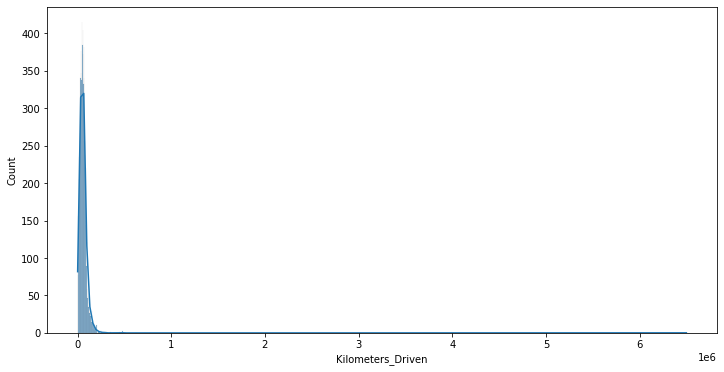

In [272]:
plt.figure(figsize = (12 ,6))
sns.histplot(data = data, x = data['Kilometers_Driven'], kde = True)
plt.show()

### Mileage

In [273]:
data['Mileage'].describe()

count    7198.000000
mean       18.184266
std         4.504070
min         0.000000
25%        15.215000
50%        18.190000
75%        21.100000
max        33.540000
Name: Mileage, dtype: float64

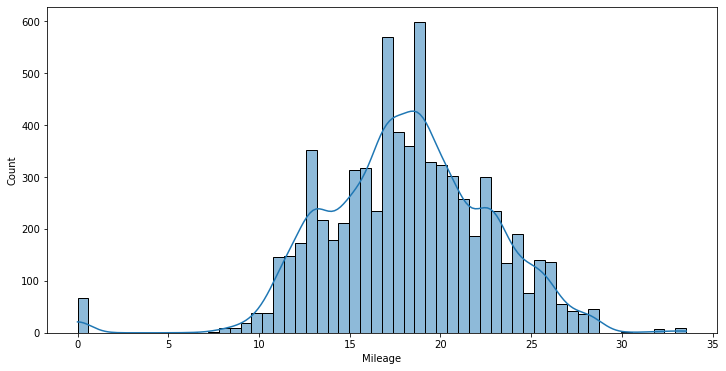

In [274]:
plt.figure(figsize = (12 ,6))
sns.histplot(data = data, x = data['Mileage'], kde = True)
plt.show()

### Engine

In [275]:
data['Engine'].describe()

count    7198.000000
mean     1616.900389
std       595.034653
min       624.000000
25%      1198.000000
50%      1493.000000
75%      1968.000000
max      5998.000000
Name: Engine, dtype: float64

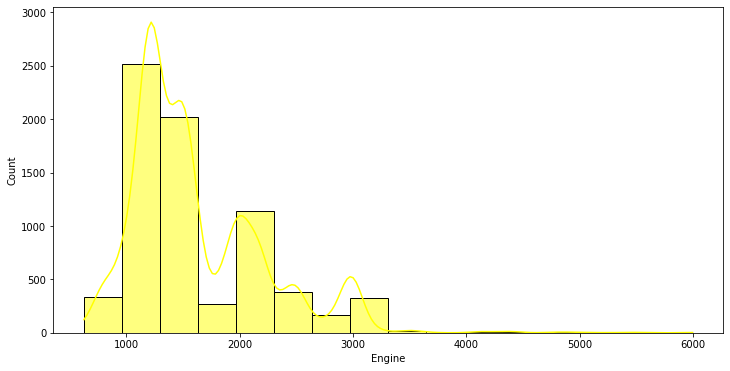

In [276]:
plt.figure(figsize = (12 ,6))
sns.histplot(data = data, x = data['Engine'], bins = 16, kde = True,color='Yellow')
plt.show()

### Power

In [277]:
data['Power'].describe()

count    7198.000000
mean      112.791815
std        53.035678
min        34.200000
25%        76.800000
50%        98.600000
75%       138.030000
max       616.000000
Name: Power, dtype: float64

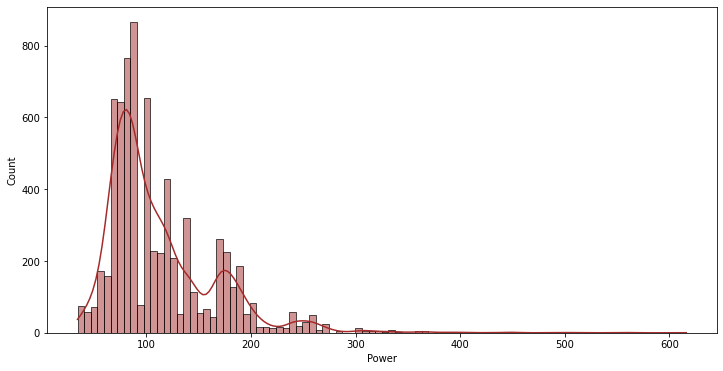

In [278]:
plt.figure(figsize = (12 ,6))
sns.histplot(data = data, x = data['Power'], kde = True,color='brown')
plt.show()

### Price

In [279]:
data['Price'].describe()

count    5975.000000
mean        9.501647
std        11.205736
min         0.440000
25%         3.500000
50%         5.650000
75%         9.950000
max       160.000000
Name: Price, dtype: float64

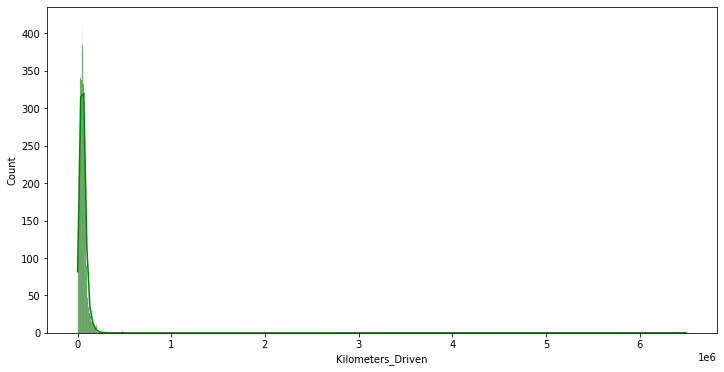

In [280]:
plt.figure(figsize = (12 ,6))
sns.histplot(data = data, x = data['Kilometers_Driven'], kde = True,color='green')
plt.show()

### Location

In [281]:
data['Location'].value_counts().sort_values(ascending = False)

Mumbai        943
Hyderabad     875
Coimbatore    770
Kochi         767
Pune          755
Delhi         655
Kolkata       647
Chennai       586
Jaipur        495
Bangalore     431
Ahmedabad     274
Name: Location, dtype: int64

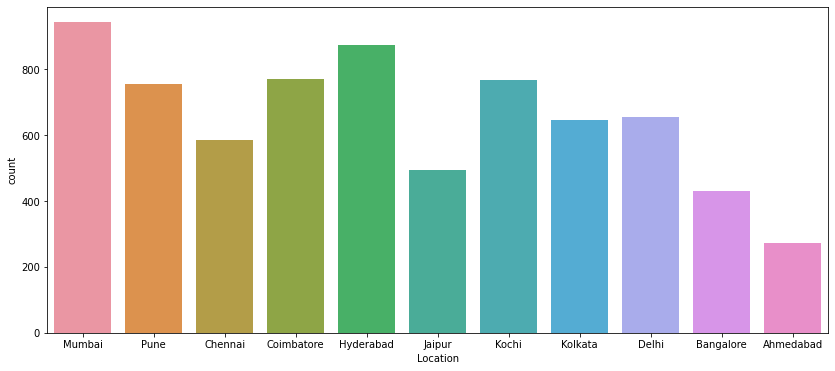

In [282]:
plt.figure(figsize = (14 ,6))
sns.countplot(data = data, x = 'Location')
plt.show()

### Owner Type

In [283]:
data['Owner_Type'].value_counts().sort_values(ascending = False)

First             5921
Second            1132
Third              134
Fourth & Above      11
Name: Owner_Type, dtype: int64

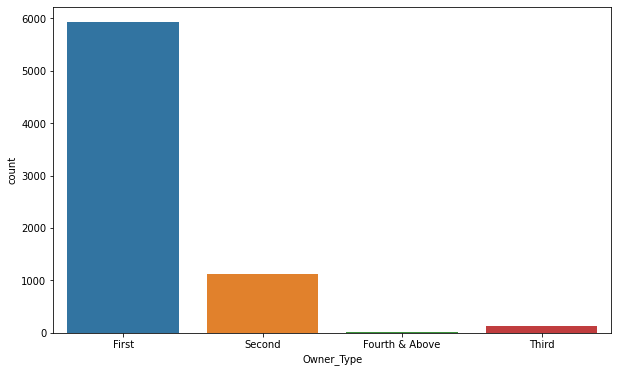

In [284]:
plt.figure(figsize = (10 ,6))
sns.countplot(data = data, x = 'Owner_Type')
plt.show()

### Fuel Type

In [285]:
data['Fuel_Type'].value_counts().sort_values(ascending = False)

Diesel    3838
Petrol    3286
CNG         62
LPG         12
Name: Fuel_Type, dtype: int64

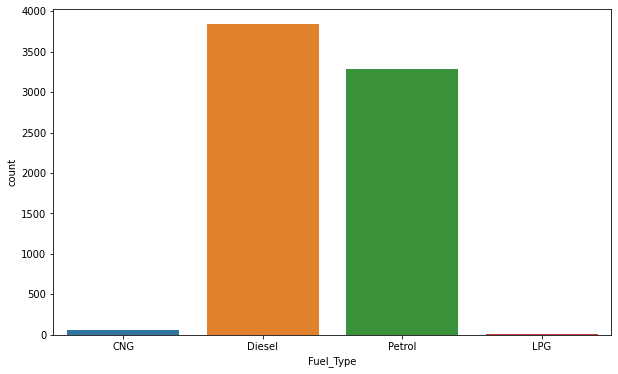

In [286]:
plt.figure(figsize = (10 ,6))
sns.countplot(data = data, x = 'Fuel_Type')
plt.show()

### Transmission

In [287]:
data['Transmission'].value_counts().sort_values(ascending = False)

Manual       5163
Automatic    2035
Name: Transmission, dtype: int64

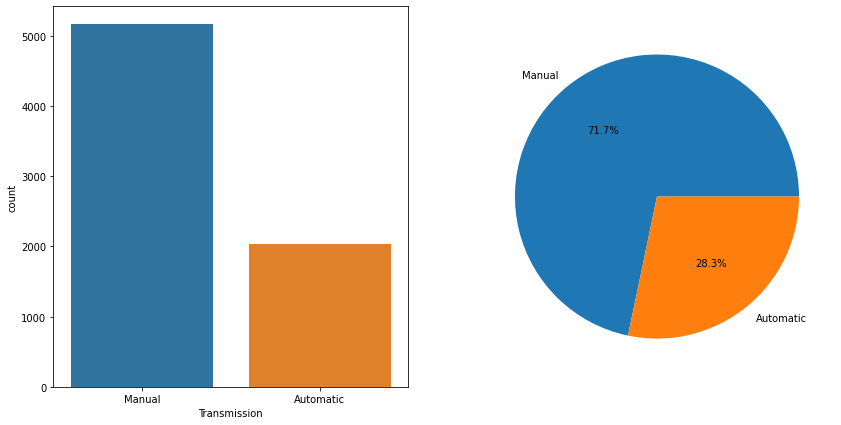

In [288]:
fig, ax = plt.subplots(1, 2, figsize = (14, 7))
sns.countplot(data = data, x = 'Transmission', ax = ax[0])
ax[1].pie(data['Transmission'].value_counts().values, labels = data['Transmission'].value_counts().index, 
          autopct = '%1.1f%%')
plt.show()

### Seats

In [289]:
data['Seats'].value_counts().sort_values(ascending = False)

5.0     6045
7.0      796
8.0      170
4.0      119
6.0       38
2.0       18
10.0       8
9.0        3
0.0        1
Name: Seats, dtype: int64

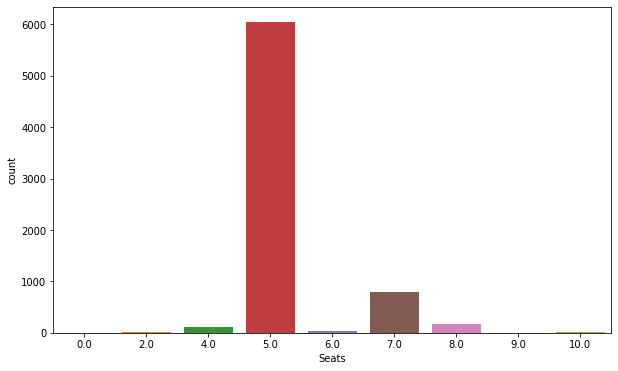

In [290]:
plt.figure(figsize = (10 ,6))
sns.countplot(data = data, x = 'Seats')
plt.show()

### Correlations between features and Target Variable

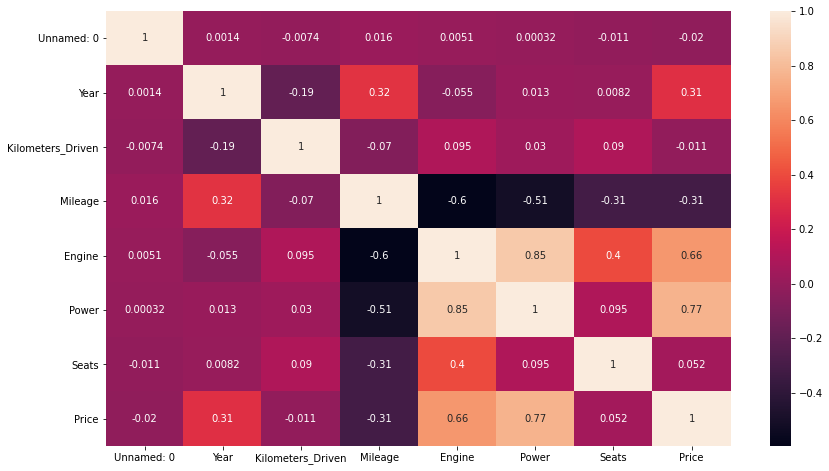

In [293]:
plt.figure(figsize = (14, 8))
sns.heatmap(data.corr(), annot = True)
plt.show()

### Year & Price

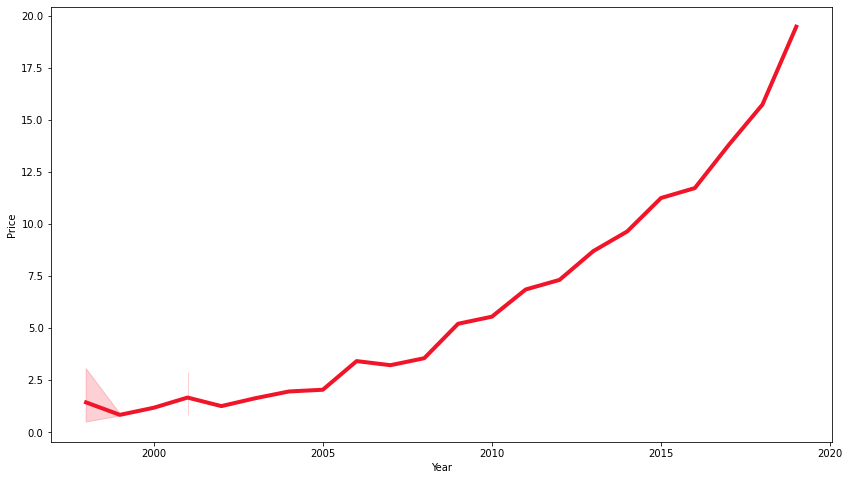

In [294]:
plt.figure(figsize = (14, 8))
sns.lineplot(data = data, x = 'Year', y = 'Price', linewidth = 4, color = '#f01528')
plt.show()

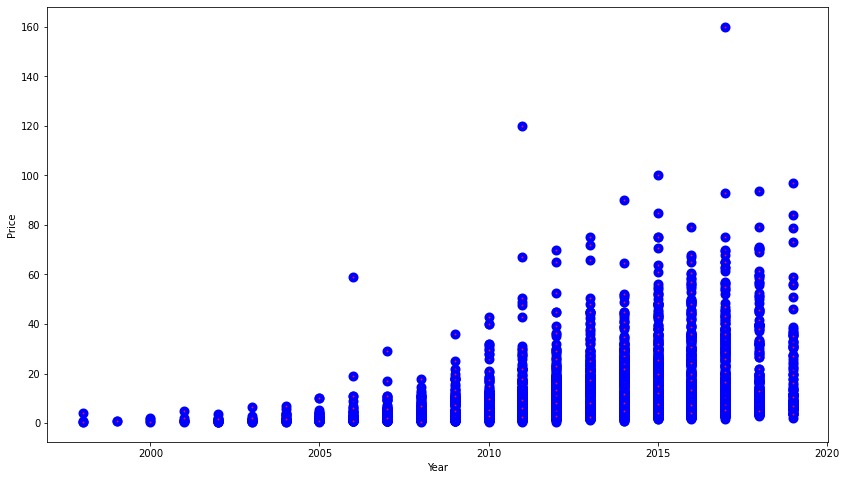

In [295]:
plt.figure(figsize = (14, 8))
sns.scatterplot(data = data, x = 'Year', y = 'Price', linewidth = 4, color = '#f01528', edgecolor = "blue")
plt.show()

#### Note:
**There is a positive relationship between the price of the car and the year of the car, as the price of the car increases every year.**

### Kilometers_Driven & Price

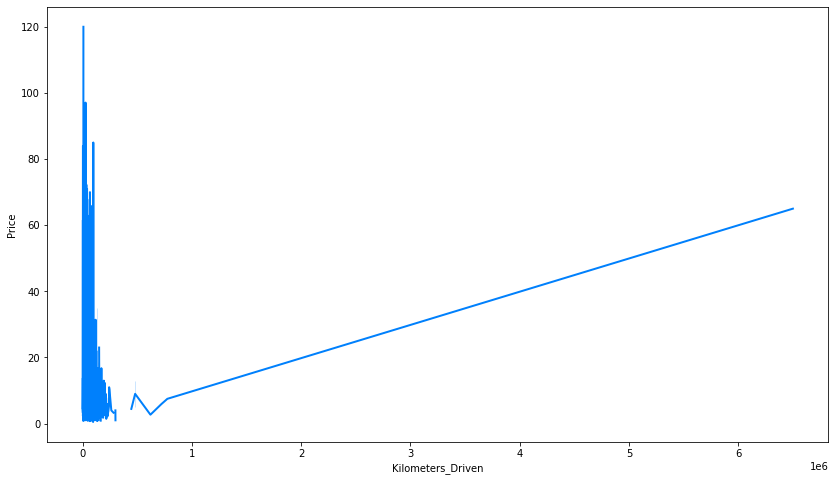

In [296]:
plt.figure(figsize = (14, 8))
sns.lineplot(data = data, x = 'Kilometers_Driven', y = 'Price', linewidth = 2, color = '#0080fc')
plt.show()

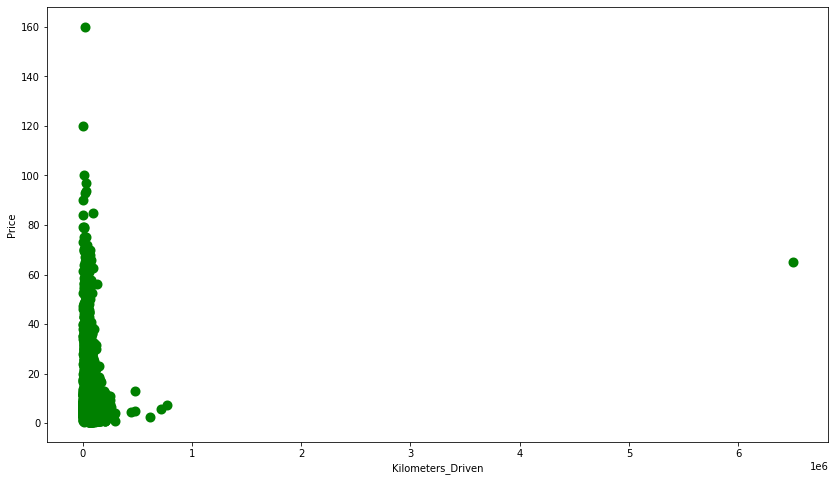

In [297]:
plt.figure(figsize = (14, 8))
sns.scatterplot(data = data, x = 'Kilometers_Driven', y = 'Price', linewidth = 4, color = 'green', edgecolor = "green")
plt.show()

#### Note:
**The relation between kilometers driven and car price is a measure of how much a car has been driven. In general, as the number of kilometers driven increases, the price of the car tends to decrease.**

### Mileage & Price

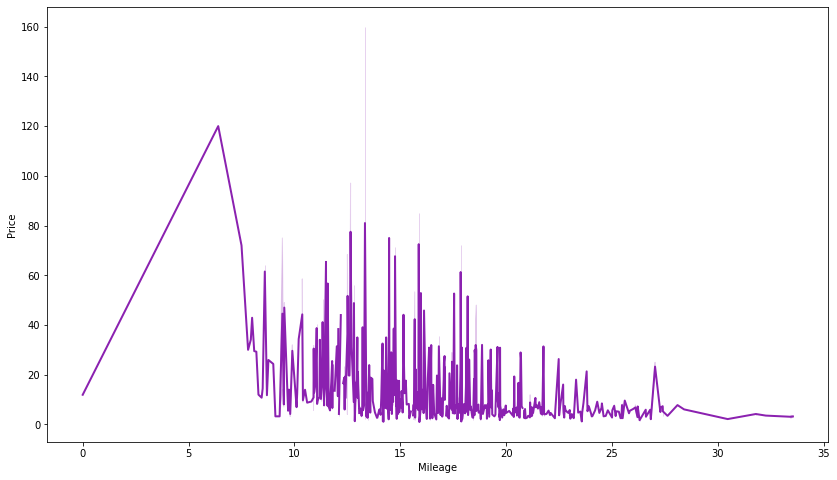

In [298]:
plt.figure(figsize = (14, 8))
sns.lineplot(data = data, x = 'Mileage', y = 'Price', linewidth = 2, color = '#8b21b0')
plt.show()

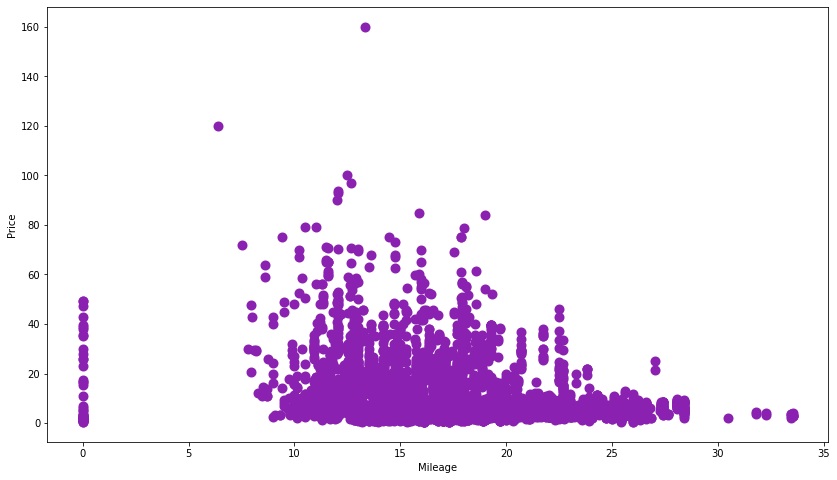

In [299]:
plt.figure(figsize = (14, 8))
sns.scatterplot(data = data, x = 'Mileage', y = 'Price', linewidth = 4, color = '#8b21b0', edgecolor = "#8b21b0")
plt.show()

#### Note: 
**The relation between mileage and car price is negative, meaning that as the mileage of a car increases, the price of the car tends to decrease. This is because higher mileage indicates that the car has been driven more, which can lead to more wear and tear on the engine, transmission, and other components**

### Engine & Price

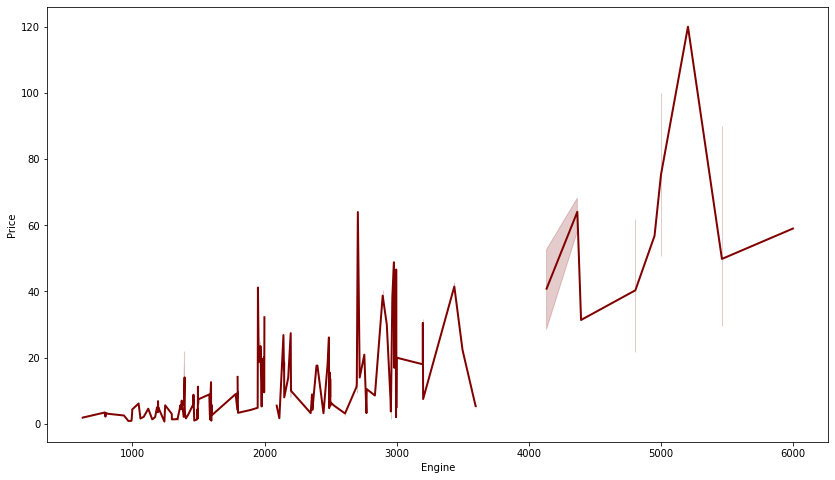

In [300]:
plt.figure(figsize = (14, 8))
sns.lineplot(data = data, x = 'Engine', y = 'Price', linewidth = 2, color = '#800000')
plt.show()

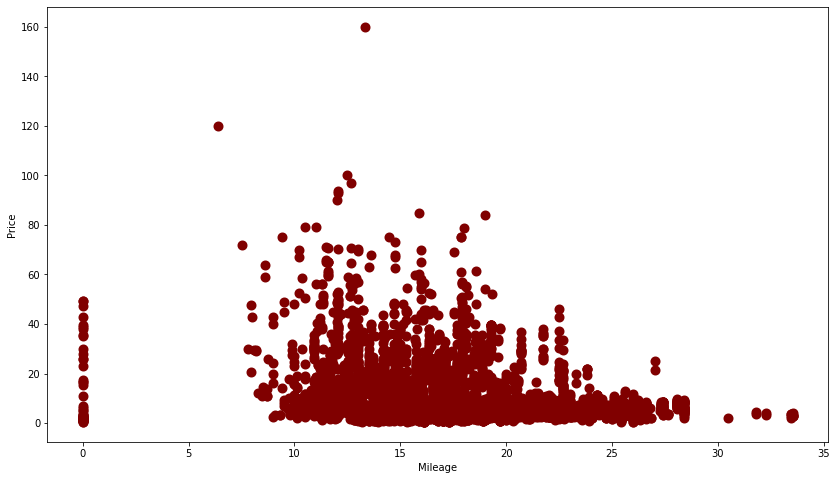

In [301]:
plt.figure(figsize = (14, 8))
sns.scatterplot(data = data, x = 'Mileage', y = 'Price', linewidth = 4, color = '#800000', edgecolor = "#800000")
plt.show()

#### Note:
**The relation between engine and car price is positive, meaning that the car engine is one of the factors that can impact the price of a car. Generally, a more powerful engine will increase the price of the car.**

### Power & Price

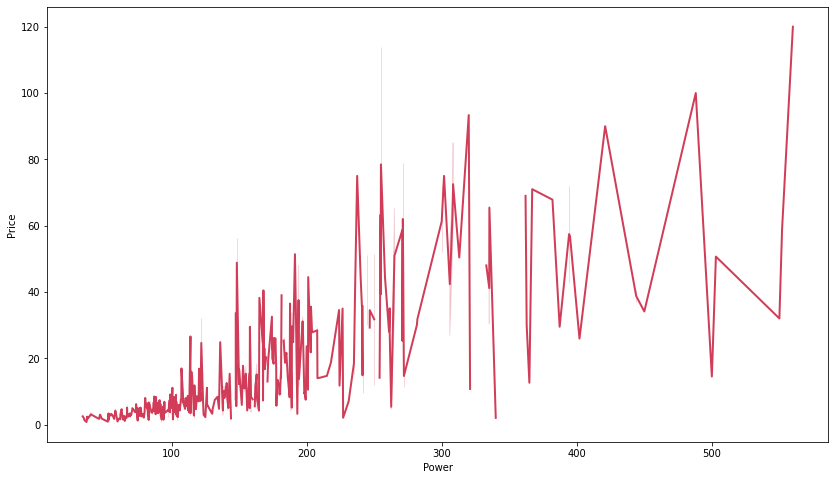

In [302]:
plt.figure(figsize = (14, 8))
sns.lineplot(data = data, x = 'Power', y = 'Price', linewidth = 2, color = '#d13d59')
plt.show()

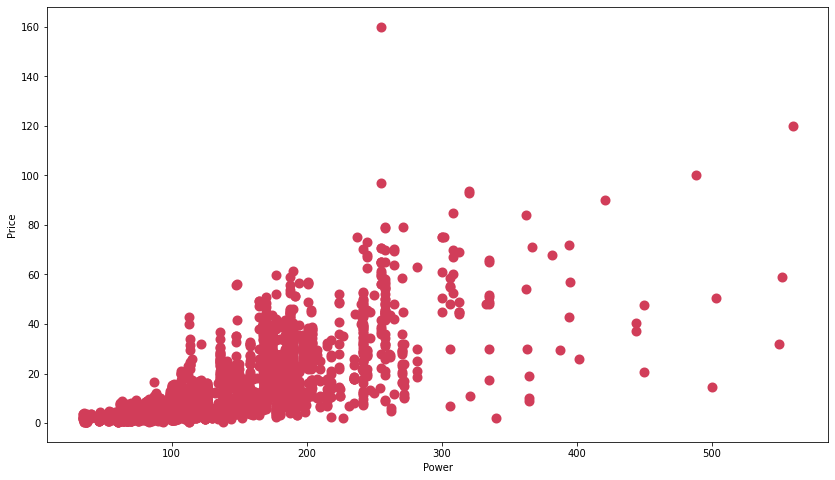

In [303]:
plt.figure(figsize = (14, 8))
sns.scatterplot(data = data, x = 'Power', y = 'Price', linewidth = 4, color = '#d13d59', edgecolor = "#d13d59")
plt.show()

#### Note:
**The relation between the power of a car and the price of a car is positive, meaning that cars with more power tend to be more expensive than cars with less power. This is because higher-powered cars often have larger engines and more advanced technology, which can increase their manufacturing costs.**

### Seats & Price

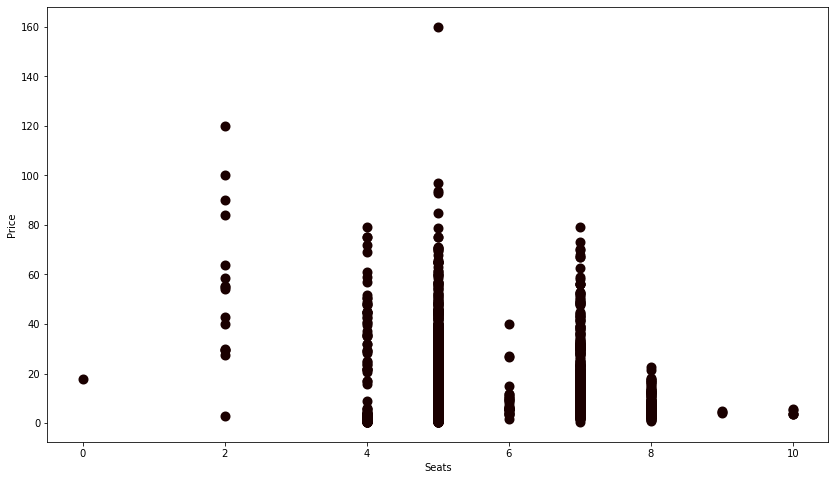

In [304]:
plt.figure(figsize = (14, 8))
sns.scatterplot(data = data, x = 'Seats', y = 'Price', linewidth = 4, color = '#1a0000', edgecolor = "#1a0000")
plt.show()

#### Note:
**The number of seats in a car can affect its price, cars that have 5 seats have the highest price, followed by cars that have 4 and 7 seats.**

### Fuel_Type & Price

In [305]:
data_fuel_price = data.groupby('Fuel_Type')['Price'].median().sort_values(ascending = False)
data_fuel_price

Fuel_Type
Diesel    7.75
Petrol    4.15
CNG       3.25
LPG       2.60
Name: Price, dtype: float64

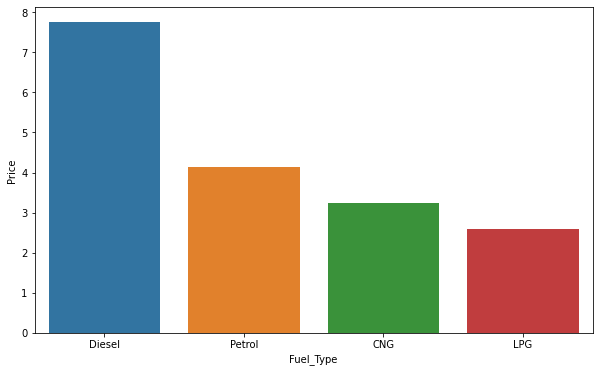

In [306]:
plt.figure(figsize = (10, 6))
ax = sns.barplot(x = data_fuel_price.index, y = data_fuel_price.values)
ax.set_ylabel("Price")
plt.show()

#### Note:
**The cars that use fuel-type diesel have higher prices.**

### Owner_Type & Price

In [307]:
data_owner_price = data.groupby('Owner_Type')['Price'].median().sort_values(ascending = False)
data_owner_price

Owner_Type
First             5.950
Second            4.300
Fourth & Above    3.125
Third             2.650
Name: Price, dtype: float64

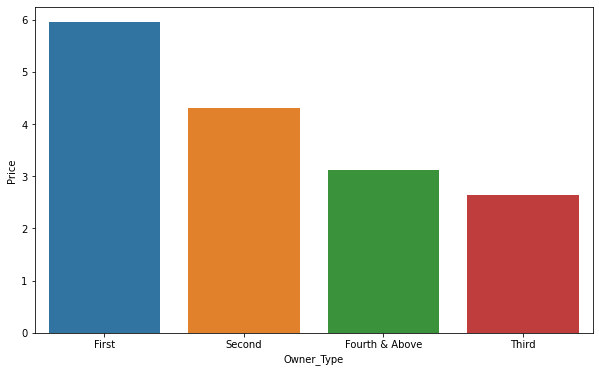

In [308]:
plt.figure(figsize = (10, 6))
ax = sns.barplot(x = data_owner_price.index, y = data_owner_price.values)
ax.set_ylabel("Price")
plt.show()

#### Note:
**The cars that had only one owner have a higher price than the cars that had multiple owners.**

### Location & Price

In [309]:
data_loca_price = data.groupby('Location')['Price'].median().sort_values(ascending = False)
data_loca_price

Location
Coimbatore    8.305
Bangalore     6.950
Kochi         6.720
Ahmedabad     5.900
Hyderabad     5.800
Mumbai        5.750
Delhi         5.500
Chennai       4.500
Pune          4.340
Jaipur        4.250
Kolkata       3.750
Name: Price, dtype: float64

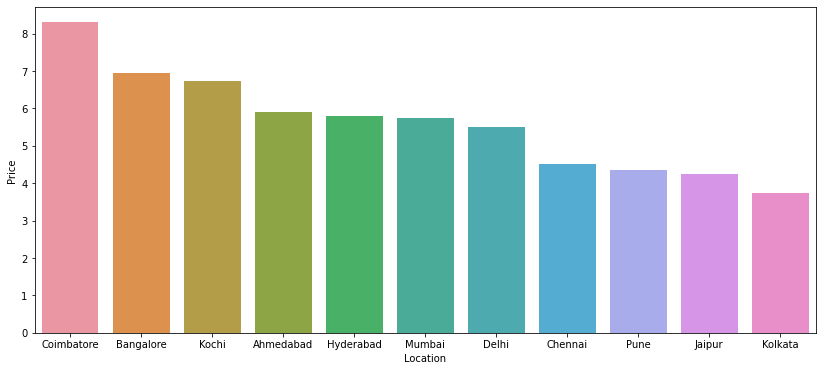

In [310]:
plt.figure(figsize = (14, 6))
ax = sns.barplot(x = data_loca_price.index, y = data_loca_price.values)
ax.set_ylabel("Price")
plt.show()

#### Notes:
**Cars in Coimbatore are higher priced than cars in other regions.**

**Cars in Ahmedabad, Hyderabad, Mumbai, and Delhi are the same price.**

### Transmission & Price

In [311]:
data_trans_price = data.groupby('Transmission')['Price'].median().sort_values(ascending = False)
data_trans_price

Transmission
Automatic    16.00
Manual        4.55
Name: Price, dtype: float64

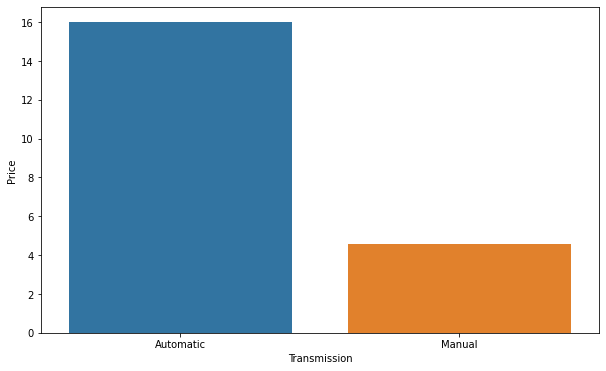

In [312]:
plt.figure(figsize = (10, 6))
ax = sns.barplot(x = data_trans_price.index, y = data_trans_price.values)
ax.set_ylabel("Price")
plt.show()

#### Note:
**The cars that have a transmission automatic are higher priced than the cars that have a transmission Manual.**

##  Multivariate Analysis

### Fuel_Type & Transmission & Engine & Power & Price

In [316]:
data.groupby(['Fuel_Type', 'Transmission'])['Engine'].median().sort_values(ascending = False)

Fuel_Type  Transmission
Diesel     Automatic       2143.0
Petrol     Automatic       1591.0
Diesel     Manual          1461.0
Petrol     Manual          1197.0
LPG        Manual          1061.0
CNG        Manual           998.0
Name: Engine, dtype: float64

In [317]:
data.groupby(['Fuel_Type', 'Transmission'])['Power'].median().sort_values(ascending = False)

Fuel_Type  Transmission
Diesel     Automatic       175.56
Petrol     Automatic       118.00
Diesel     Manual           90.00
Petrol     Manual           81.86
LPG        Manual           58.20
CNG        Manual           58.20
Name: Power, dtype: float64

In [318]:
data.groupby(['Fuel_Type', 'Transmission'])['Price'].median().sort_values(ascending = False)

Fuel_Type  Transmission
Diesel     Automatic       21.50
Petrol     Automatic        6.93
Diesel     Manual           5.75
Petrol     Manual           3.60
CNG        Manual           3.25
LPG        Manual           2.60
Name: Price, dtype: float64

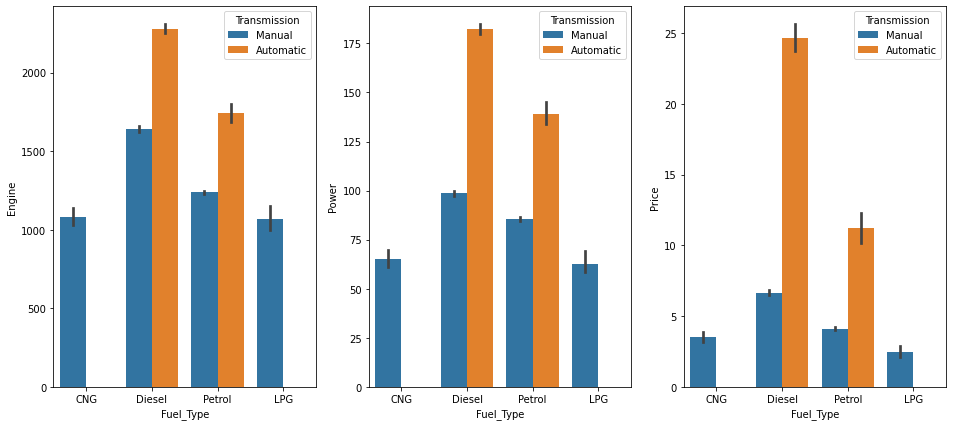

In [319]:
fig, ax = plt.subplots(1, 3, figsize = (16, 7))
sns.barplot(data = data, x = 'Fuel_Type', y = 'Engine', hue = 'Transmission', ax = ax[0])
sns.barplot(data = data, x = 'Fuel_Type', y = 'Power', hue = 'Transmission', ax = ax[1])
sns.barplot(data = data, x = 'Fuel_Type', y = 'Price', hue = 'Transmission', ax = ax[2])
plt.show()

#### Note:
**The cars that use fuel-type diesel and have a transmission automatic have a higher engine equal to 2143CC,  higher power equal to 174bhp, and the price of these cars is very high.**

### Owner_Type & Transmission  & Fuel_Type & Price

In [320]:
data.groupby(['Owner_Type', 'Transmission'])['Price'].median().sort_values(ascending = False)

Owner_Type      Transmission
First           Automatic       16.95
Second          Automatic       12.07
Third           Automatic        5.65
Fourth & Above  Automatic        5.50
First           Manual           4.90
Second          Manual           3.26
Fourth & Above  Manual           3.00
Third           Manual           2.20
Name: Price, dtype: float64

In [321]:
data.groupby(['Owner_Type', 'Fuel_Type'])['Price'].median().sort_values(ascending = False)

Owner_Type      Fuel_Type
First           Diesel       7.980
Second          Diesel       6.750
First           Petrol       4.450
Third           Diesel       4.155
First           CNG          3.500
Fourth & Above  Petrol       3.250
                Diesel       3.000
Second          Petrol       2.980
                CNG          2.900
First           LPG          2.600
Second          LPG          2.250
Third           Petrol       1.955
                CNG          1.200
Name: Price, dtype: float64

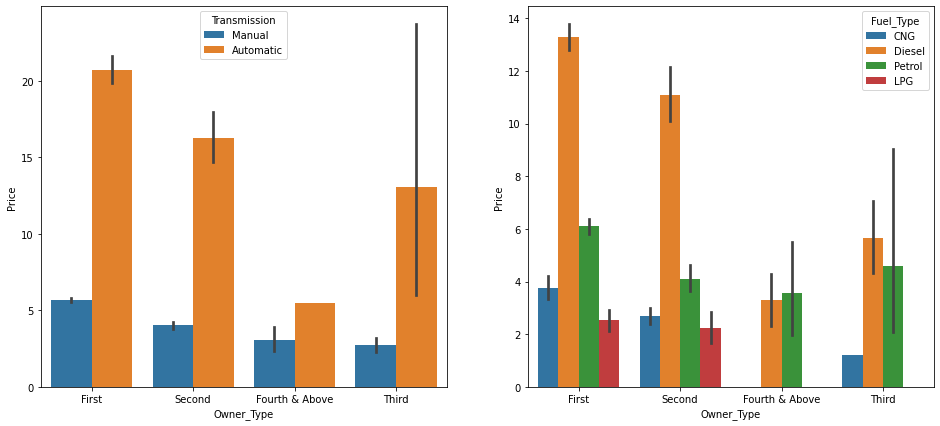

In [322]:
fig, ax = plt.subplots(1, 2, figsize = (16, 7))
sns.barplot(data = data, x = 'Owner_Type', y = 'Price', hue = 'Transmission', ax = ax[0])
sns.barplot(data = data, x = 'Owner_Type', y = 'Price', hue = 'Fuel_Type', ax = ax[1])
plt.show()

#### Note:
**The cars that use fuel-type diesel, and had only one owner, and have a transmission automatic the price of these cars is very high, compared to the cars that had multiple owners and have a transmission man manual and use different fuel-type.**

### Location & Transmission & Fuel_Type & Price

In [323]:
data.groupby(['Location', 'Transmission'])['Price'].median().sort_values(ascending = False)

Location    Transmission
Coimbatore  Automatic       25.020
Bangalore   Automatic       21.870
Kochi       Automatic       18.455
Hyderabad   Automatic       18.125
Delhi       Automatic       15.750
Ahmedabad   Automatic       15.750
Jaipur      Automatic       12.875
Chennai     Automatic       12.500
Mumbai      Automatic       11.600
Pune        Automatic       11.500
Kolkata     Automatic       11.370
Coimbatore  Manual           6.580
Kochi       Manual           5.730
Bangalore   Manual           5.350
Hyderabad   Manual           4.900
Mumbai      Manual           4.750
Ahmedabad   Manual           4.750
Delhi       Manual           4.425
Jaipur      Manual           4.000
Chennai     Manual           4.000
Pune        Manual           3.500
Kolkata     Manual           3.450
Name: Price, dtype: float64

In [324]:
data.groupby(['Location', 'Fuel_Type'])['Price'].median().sort_values(ascending = False)

Location    Fuel_Type
Coimbatore  Diesel       14.400
Bangalore   Diesel       12.495
Mumbai      Diesel        9.450
Kochi       Diesel        9.440
Delhi       Diesel        7.850
Ahmedabad   Diesel        7.500
Hyderabad   Diesel        7.175
Pune        Diesel        6.550
Chennai     Diesel        6.300
Coimbatore  Petrol        5.895
Jaipur      Diesel        5.725
Kochi       Petrol        5.550
Kolkata     Diesel        4.875
Mumbai      Petrol        4.800
Bangalore   Petrol        4.750
Kochi       CNG           4.165
Delhi       Petrol        4.150
Chennai     CNG           4.100
Ahmedabad   Petrol        4.075
Hyderabad   Petrol        3.450
Chennai     Petrol        3.400
Mumbai      CNG           3.350
Ahmedabad   CNG           3.300
Pune        Petrol        3.100
Kolkata     Petrol        3.000
Pune        CNG           3.000
Hyderabad   LPG           2.975
Jaipur      Petrol        2.850
Delhi       CNG           2.825
Jaipur      LPG           2.560
Hyderabad   CNG   

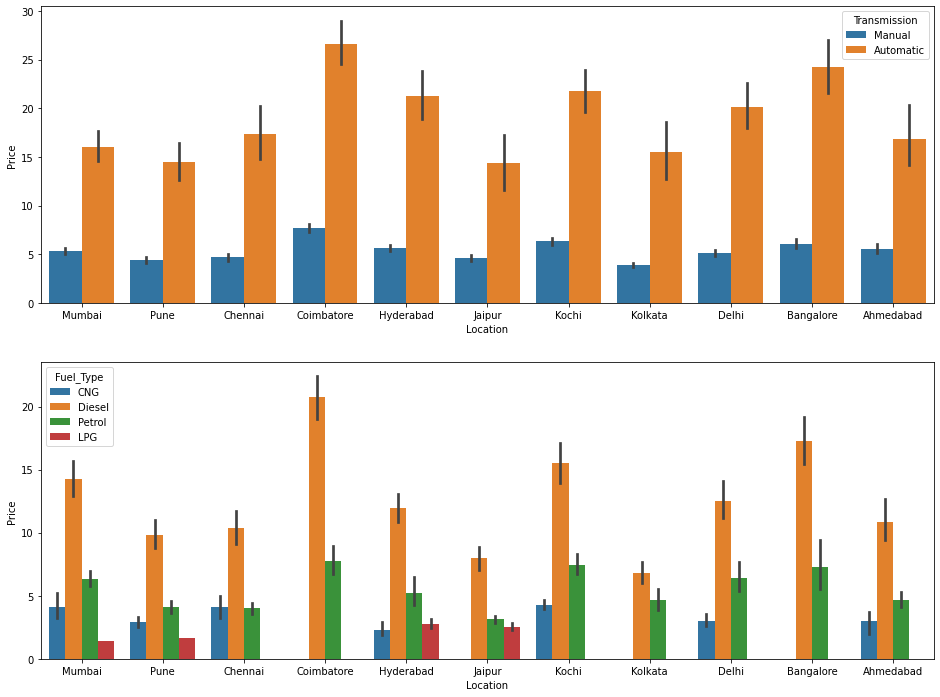

In [325]:
fig, ax = plt.subplots(2, 1, figsize = (16, 12))
sns.barplot(data = data, x = 'Location', y = 'Price', hue = 'Transmission', ax = ax[0])
sns.barplot(data = data, x = 'Location', y = 'Price', hue = 'Fuel_Type', ax = ax[1])
plt.show()

#### Which car records Highest Price

In [326]:
C= np.where(RegressionData['Price'] == RegressionData['Price'].max())
print ("Highest price of car in records is")
RegressionData.iloc[C]

Highest price of car in records is


,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
4079,4079,Land Rover Range Rover 3.0 Diesel LWB Vogue,Hyderabad,2017,25000,Diesel,Automatic,First,13.33,2993.0,255.0,5.0,160.0


## 3- Feature Engineering

#### Encode Categorical Variables

Convert all discrete categorical variables into continous integer representation through indicator and Label Encoding of a dataframe

In [327]:
RegressionData["Fuel_Type"] = RegressionData["Fuel_Type"].astype('category')
RegressionData["Fuel_Type_EN"] = RegressionData["Fuel_Type"].cat.codes

RegressionData["Transmission"] = RegressionData["Transmission"].astype('category')
RegressionData["Transmission_EN"] = RegressionData["Transmission"].cat.codes

RegressionData["Owner_Type"] = RegressionData["Owner_Type"].astype('category')
RegressionData["Owner_Type_EN"] = RegressionData["Owner_Type"].cat.codes


RegressionData["Location"] = RegressionData["Location"].astype('category')
RegressionData["Location_EN"] = RegressionData["Location"].cat.codes

In [328]:
RegressionData

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Fuel_Type_EN,Transmission_EN,Owner_Type_EN,Location_EN
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,0,1,0,9
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,1,1,0,10
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,3,1,0,2
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,1,1,0,2
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,1,0,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,1,1,0,5
1230,1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,NaN,3,0,0,9
1231,1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0,NaN,1,1,0,8
1232,1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0,NaN,3,0,3,10


### Outlier Detection

#### Normalize Data

Use Standard Scalar normalization for our current data that can convert the range of different column values into standard range of 0-1  

In [194]:
# RegressionData = preprocessing.normalize()

#### Quantitative variables = "year_of_registration"
Year of Registrartion: The first known intrdoction of car was 'The Model T' by ford motors in 1908 so any value in dataset before this year will considered erroneous.

In [345]:
df_pr_year =RegressionData.loc[ 
     (RegressionData['Year'].between(1998, 2020))]

A dataframe namely "df_pr_year" is now created to as per the condition.

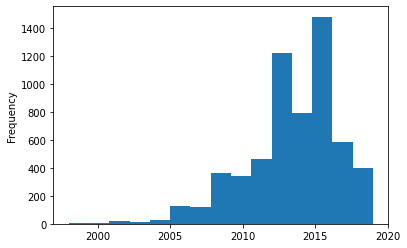

In [346]:
df_pr_year['Year'].plot.hist(bins=15);

In [347]:
df_pr_year['Year'].describe()

count    5975.000000
mean     2013.386778
std         3.247238
min      1998.000000
25%      2012.000000
50%      2014.000000
75%      2016.000000
max      2019.000000
Name: Year, dtype: float64

/home/admins/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


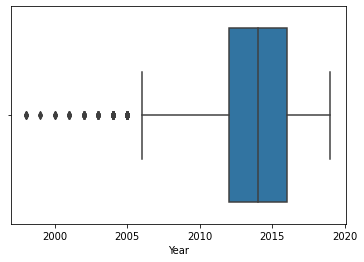

In [348]:
sns.boxplot(df_pr_year['Year']);

These outcomes of quartiles are showing that even though there's higher dispersion between mean and minimum value of dataset but still more dataset is lying between 2013 and 2018 with  a mean value of 2013.

As per this article [Average age of UK cars](https://www.autoexpress.co.uk/news/59950/average-age-uk-cars-reaches-record-high#:~:text=The%20average%20UK%20car%20is,2009%20to%2040.35%20million%20units&text=The%20average%20age%20of%20a,earlier%20still%20on%20the%20road.) is 8.4-years-old. Vehicle after certain age lists for scrap or their value deprecate to the point where it has no value because of higher insurance, MOT or other vehicle running parameter which are not subject of this research. 


This boxplot is also showing that the dataset is mostly comprised off more vehicle from year 2005 and 2020. Couple that with be imparative of car age above, it is wiser to take the dataset of cars between the age of 15 years only that is 2005-2020 leaving the extreme values and outliers behind in the main dataframe.

In [349]:
df_pr_year_05_20= df_pr_year.loc[ 
     (df_pr_year['Year'].between(2005, 2020))]

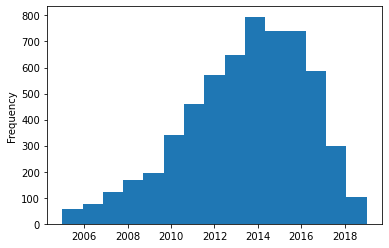

In [350]:
  df_pr_year_05_20['Year'].plot.hist(bins=15);

### Analysis of the Relationship

#### Best preditor of the price of a vehicle 
Eventhough all the features combine have a impact on the determination of the final price of vehicle but of all features in the dataset these two seems to have the strongest association with the feature price.
#### Impact of quantitative varable of 'year_of_registration' on the price of the car.
The quantitative varable of 'year_of_registration' checked to see the impact of change in the price of car with change in year of registration. The topmost car model from the lineup of standard make having higest count advert in the datset checked in this. The are checked for most frequently used fuel types in the same model where available. 

After comparision, it seems like car price have a directly proportional relationship with the year of registartion. Year have a significant impact on the price of car as when year increases or decreases the price also increase of decrease. These will be further explained in the analysis part.
####  Impact of quantitative varable of 'mileage' on the price of the car.
The influence of a change in the price of an automobile with a change in mileage was examined using the quantitative variable 'mileage.' Various car makes are tested from a single car maker having line up of vehicle across the range of top most fuel types in the dataset. 
After comparison, it appears that automobile price and mileage have an inversly proportional relationship. Mileage has a considerable impact on automobile prices as mileage grows, vehicle prices decline, but vehicles with lower mileage sell for more money in the same model. These will be addressed in further detail in the analysis section.



####  Impact of quantitative varable of 'year_of_registration' on the price of the car.

Price have a directly proportional relationship with the year of registartion. Year have a significant impact on the price of car as when year increases or decreases the price also increase of decrease.
Price of vehicle is positively correlated with registration year of the corresponding vehicle.


with the above applied conditions the graph is free of outliers and other extereme value. It can be shown from the graph that it the adverts for the cars are increasing with the progression in the year of registration with majority of advers being posted for the cars having registration numbers from the last 05 years i.e. 2015-2020.

#### Quantitative variables = "mileage"

The second most important quantitative variables is mileage of a car. lets have a look at basic statistics of this cars to get the idea of the data.



In [351]:
df_pr_year_05_20['Mileage'].describe()

count    5900.000000
mean       18.236358
std         4.481299
min         0.000000
25%        15.290000
50%        18.200000
75%        21.100000
max        33.540000
Name: Mileage, dtype: float64

Max output shows that data might have some exteme value as 999999 is too unrealistic for a value of a car. Also, with a mean that have almost equal value of standard deviation it is good idea to also derive the value of median of the column mileage.

Minimum value of 0 also means that column may have shome missing or null values. Null values will be filled with the values of median as it is not influnced by extereme values in the dataset which is the issues in mileage column.

It will be a good practise to remove the outliers in the mileage. This will be particularly useful during the analysis process.

/home/admins/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


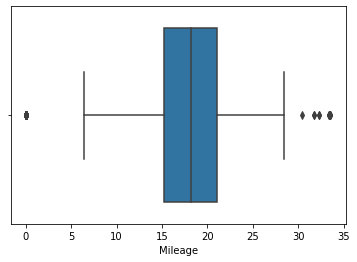

In [352]:
sns.boxplot(df_pr_year['Mileage'])
plt.ticklabel_format(style='plain', axis='x')
plt.show()



As it can be seen by boxplot that most of the values of this dataset lies between 5 to 27. So, this condition will be used to extract the most of the dataset.

In [353]:
df_pr_year_05_20_Nan_miles= df_pr_year_05_20.loc[ 
     (df_pr_year_05_20['Mileage'].between(5, 28))]

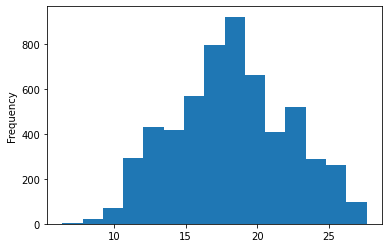

In [354]:
df_pr_year_05_20_Nan_miles['Mileage'].plot.hist(bins=15);

## 4- Feature Selection

 #### 1) Droping Non-related columns of data (with respect to target variable)
 
 ##### a) Unnamed: 0: 
 We can see that in description of data that each value of Unnamed:0 column indicate to unique vehicle/car of data,  it means there is no correlation between dependent variable (price) and this independent variable (ID Column) so this column won't help any predictor to predict price of any car, so we drop this column
 
 ##### b) Name:
 
 Since name of the car includes other details as well which is redundant in terms of predicting the price and has no relationship with target. So we drop this columns
 ##### c) Fuel Type: 
 We encode categorical Fuel type to numeric so this columns is now redundant in Dataset
 
 ##### d) Owner Type: 
 We encode categorical Owner type to numeric so this columns is now redundant in Dataset
 
 ##### e) Transmission: 
 We encode categorical Transmission to numeric so this columns is now redundant in Dataset
 
  
 ##### e) Location: 
 We encode categorical Location to numeric so this columns is now redundant in Dataset
 

In [355]:
# Remove Reference Column

del df_pr_year_05_20_Nan_miles['Unnamed: 0']
print("Updated Shape of Data: ",df_pr_year_05_20_Nan_miles.shape)


del df_pr_year_05_20_Nan_miles['Fuel_Type']
print("Updated Shape of Data: ",df_pr_year_05_20_Nan_miles.shape)

del df_pr_year_05_20_Nan_miles['Owner_Type']
print("Updated Shape of Data: ",df_pr_year_05_20_Nan_miles.shape)

del df_pr_year_05_20_Nan_miles['Transmission']
print("Updated Shape of Data: ",df_pr_year_05_20_Nan_miles.shape)

del df_pr_year_05_20_Nan_miles['Name']
print("Updated Shape of Data: ",df_pr_year_05_20_Nan_miles.shape)

del df_pr_year_05_20_Nan_miles['Location']
print("Updated Shape of Data: ",df_pr_year_05_20_Nan_miles.shape)

Updated Shape of Data:  (5770, 16)
Updated Shape of Data:  (5770, 15)
Updated Shape of Data:  (5770, 14)
Updated Shape of Data:  (5770, 13)
Updated Shape of Data:  (5770, 12)
Updated Shape of Data:  (5770, 11)


In [356]:
# Separate Data columns and Target column

Y= np.array(df_pr_year_05_20_Nan_miles['Price'])


# del df_pr_year_05_20_Nan_miles['price']


X= copy.deepcopy(df_pr_year_05_20_Nan_miles)

#### Split Data

In [357]:
# Split Data in 75:25 Ratio of Training and Testing

X= copy.deepcopy(df_pr_year_05_20_Nan_miles)
X

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=20211208,
)
print ("Shape of Training Data: \n" ,"Train X: ",X_train.shape,"\nTrain Y: " ,y_train.shape)
print ("\nShape of Testing Data: \n" ,"Train X: ",X_test.shape,"\nTrain Y: " ,y_test.shape)



Shape of Training Data: 
 Train X:  (4039, 11) 
Train Y:  (4039,)

Shape of Testing Data: 
 Train X:  (1731, 11) 
Train Y:  (1731,)


## 5- Machine Learning Model Selection and Training

### 1- Train Random Forest Regressor on our Final Data

#### Pre - Model Analysis 

We Train 7 Random Forest Regressor during experimentation phase with different numbers of hyper-parameters and results of that training is given below. We choose the best model amongs all of them in terms of error and R2 scores of each model

#### Seven Different random forest regressor

##### (MAX Depth=4 , n_estimators=8 )
Mean Absolute Error is :  1150.1763023851718 

R2 Score of Random Forest Regressor:  0.7047460567913776

##### (MAX Depth=8 , n_estimators=10 )

Mean Absolute Error is :  915.135909662107 

R2 Score of Random Forest Regressor:  0.8403362963755281

##### (MAX Depth=12 , n_estimators=10 )

Mean Absolute Error is :  623.0425019066515 

R2 Score of Random Forest Regressor:  0.8624056262450477

##### (MAX Depth=12 , n_estimators=12 )

Mean Absolute Error is :  624.1108131166402 

R2 Score of Random Forest Regressor:  0.8630849299164702

##### (MAX Depth=14 , n_estimators=14 )

Mean Absolute Error is :  594.369208696923 

R2 Score of Random Forest Regressor:  0.8606467923591204

##### (MAX Depth=16 , n_estimators=14 )

Mean Absolute Error is :  610.5364509233361 

R2 Score of Random Forest Regressor:  0.8563587122272999

##### (MAX Depth=18 , n_estimators=14 )

Mean Absolute Error is :  640.2801300916701 

R2 Score of Random Forest Regressor:  0.8510731429111149


#### Justification

we can clearly see from the results of training that after mex depth reaches to 14, there is no significant decrement in mean absolute error of the  model, and despite of decreasing error, it got increment when we increase the value of max_depth parameter, so we pick the best model amongs trained above.

#### Model Training

Train Random Forest Regressor with following hyoer-parameters

max_depth=14

random_state=0

n_estimators=14
  

In [359]:
RF_regr = RandomForestRegressor(max_depth=14, random_state=0,n_estimators=14,
)
RF_regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=14, n_estimators=14, random_state=0)

#### Testing Random Forest Regressor on Test Data

In [360]:
RF_pred = RF_regr.predict(X_test)

### 2- Train Linear Regressor on our Final Data

#### Pre-Model Analysis
We Train Linear Regressor with three (3) different interations during experimentation phase  and results of that training is given below. We choose the best model amongs all of them in terms of error and R2 scores of each model

#### Linear Models with different interactions (Linear regresors)

##### A) Linear Model with LASSO (Least Absolute Shrinkage and Selection Operator) Regression

Mean Absolute Error is :  551.677457743344 

R2 Score of LASSO Regressor:  0.7281252276003869

##### B) Linear Model with Ridge Resression ( estimating the coefficients of multiple-regression models in scenarios where linearly independent variables are highly correlated)

Mean Absolute Error is :  457.4308062370083

R2 Score of Ridge Regressor:  0.7533218668092665

##### C) Linear Model with Gamma Regressor (With 0.1 Regularization parameter)

Mean Absolute Error is :  829.8144441539741  

R2 Score of Gamma Regressor:  0.8272873119302774




#### Model Training

In [361]:
## Linear Regression (Ridge Regressor)
LR2=linear_model.Ridge(0.3,solver='cholesky')
LR2.fit(X_train,y_train)


Ridge(alpha=0.3, solver='cholesky')

### 3- Train Gradiant Boosting Regressor on our Final Data

#### Pre-Model Analysis

We Train Gradiant Boosting Regressor with three (5) different sets of hyper-parameers during experimentation phase  and results of that training is given below. We choose the best model (hyper-parameters) amongs all of them in terms of error and R2 scores of each model

#### Five Different Gradiant Boosting regressor

##### (n_estimators=50 )
Mean Absolute Error is :  939.7371001282825

R2 Score of Gradiant Boosting Regressor:  0.8284638509228424

##### (n_estimators=80 )

Mean Absolute Error is :  771.2541530132214

R2 Score of Gradiant Boosting Regressor:  0.8488261206741938

##### (n_estimators=120 )

Mean Absolute Error is :  709.9786880293098 

R2 Score of Random Forest Regressor:  0.8571850188476554

##### (n_estimators=140 )

Mean Absolute Error is :  696.966573559413

R2 Score of Random Forest Regressor:  0.8600196852566747

##### (n_estimators=180 )

Mean Absolute Error is :  676.2101498932193 

R2 Score of Random Forest Regressor:  0.8635410910711339


#### Justification

we can clearly see from the results of training that after mex depth reaches to 140, there is no significant change in mean absolute error of the  model and R2 Score as well, and despite of decreasing error, it got increment when we increase the value of n_estimator parameter after 180, so we pick the best model amongs trained above.

In [362]:
GB_reg = GradientBoostingRegressor(random_state=0,n_estimators=200)
GB_reg.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=200, random_state=0)

In [363]:
GB_pred= GB_reg.predict(X_test)

### 4- Train VOTER Regression of all of the above

In [364]:
r1 = linear_model.GammaRegressor(alpha=0.1)
r2 = RandomForestRegressor(n_estimators=14, max_depth=14,random_state=1)
r3 = GradientBoostingRegressor(n_estimators=180)
er = VotingRegressor([('lr', r1), ('rf', r2), ('gb', r3)])
er.fit(X_train,y_train)

/home/admins/.local/lib/python3.6/site-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/home/admins/.local/lib/python3.6/site-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/home/admins/.local/lib/python3.6/site-packages/sklearn/_loss/glm_distribution.py:246: RuntimeWarning: overflow encountered in power
  return np.power(y_pred, self.power)
/home/admins/.local/lib/python3.6/site-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)


VotingRegressor(estimators=[('lr', GammaRegressor(alpha=0.1)),
                            ('rf',
                             RandomForestRegressor(max_depth=14,
                                                   n_estimators=14,
                                                   random_state=1)),
                            ('gb',
                             GradientBoostingRegressor(n_estimators=180))])

In [365]:
Voter_pred = er.predict(X_test)

## 6- Model Evaluation and Analysis



### 1- Linear Regression

In [366]:
LR_pred = LR2.predict(X_test)

In [367]:
LR_Error=metrics.mean_absolute_error(y_test, LR_pred)
LR_R2Score= metrics.r2_score(y_true=y_test, y_pred=LR_pred)

print("Mean Absolute Error is : ",LR_Error,"\nR2 Score of Ridge Linear Regressor: ",LR_R2Score)

Mean Absolute Error is :  7.16031369905039e-06 
R2 Score of Ridge Linear Regressor:  0.9999999999987941


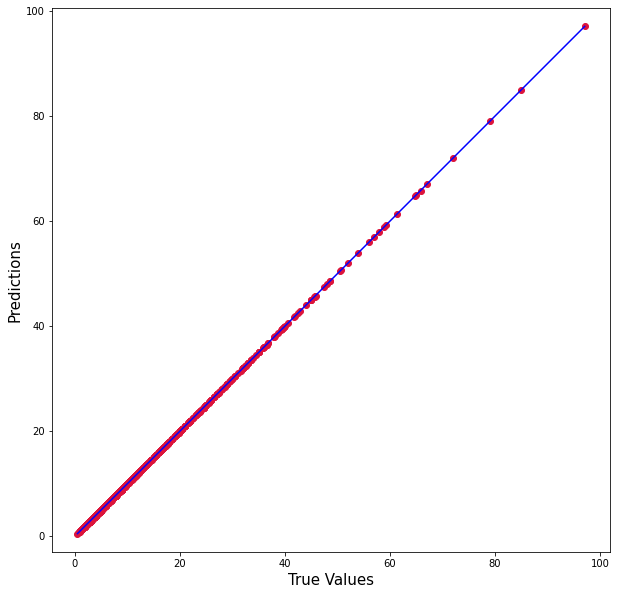

In [368]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, LR_pred, c='crimson')


p1 = max(max(LR_pred), max(y_test))
p2 = min(min(LR_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

#### Plot Error Terms / Rate of Choosed Model

/home/admins/.local/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/admins/.local/lib/python3.6/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


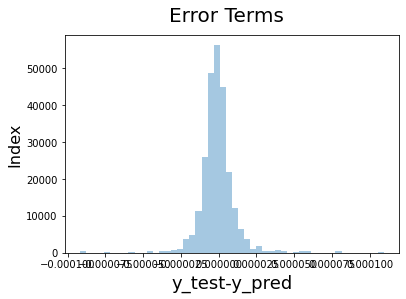

In [369]:
fig = plt.figure()
sns.distplot((y_test-LR_pred),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label
plt.show()

#### Residuals of Model

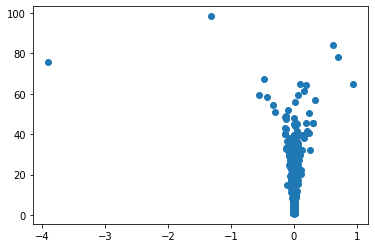

In [370]:
Residuals = y_test - RF_pred

plt.scatter(Residuals,RF_pred)

plt.show()

#### Difference between Actual and Predicted Values

In [371]:
y2_test=np.array(y_test)

predictedPrice = pd.DataFrame(LR_pred, columns=['Predicted Price']) # Create new dataframe of column'Predicted Price'
actualPrice = pd.DataFrame(y2_test, columns=['Actual Price'])
actualPrice = actualPrice.reset_index(drop=True) # Drop the index so that we can concat it, to create new dataframe
df_actual_vs_predicted = pd.concat([actualPrice,predictedPrice],axis =1)
df_actual_vs_predicted.T

,0,1,2,3,4,5,6,7,8,9,...,1721,1722,1723,1724,1725,1726,1727,1728,1729,1730
Actual Price,28.000000,10.500000,8.900000,8.10000,4.250000,5.840000,2.250000,2.010000,7.09,6.000000,...,1.990000,2.800000,32.900000,6.800000,7.500000,4.750000,3.000000,3.750000,5.480000,7.850000
Predicted Price,27.999989,10.500022,8.899998,8.10001,4.249994,5.840006,2.249999,2.009989,7.09,5.999983,...,1.989989,2.800006,32.899984,6.800005,7.500007,4.750007,2.999998,3.750001,5.480002,7.850011


### Random Forest Regressor

In [372]:
RF_Error=metrics.mean_absolute_error(y_test, RF_pred)
RF_R2Score= metrics.r2_score(y_true=y_test, y_pred=RF_pred)

print("Mean Absolute Error is : ",RF_Error,"\nR2 Score of Random Forest Regressor: ",RF_R2Score)

Mean Absolute Error is :  0.01453783939919134 
R2 Score of Random Forest Regressor:  0.9998830360525167


#### Regression Plot

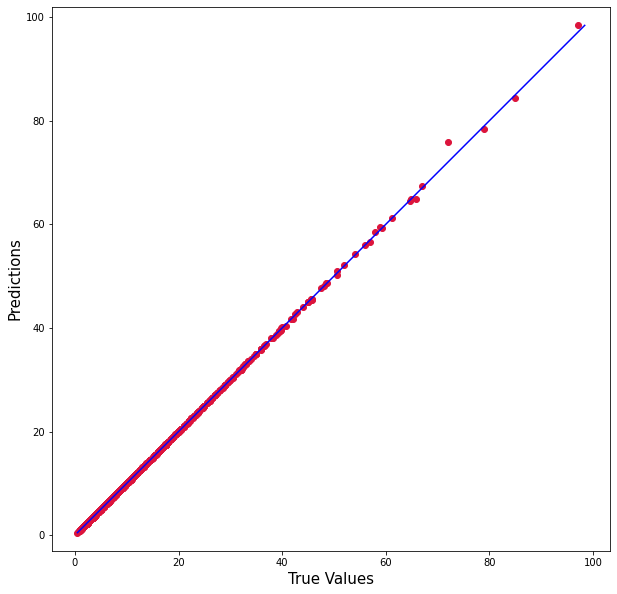

In [373]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, RF_pred, c='crimson')


p1 = max(max(RF_pred), max(y_test))
p2 = min(min(RF_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

#### Plot Error Terms / Rate of Choosed Model

/home/admins/.local/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


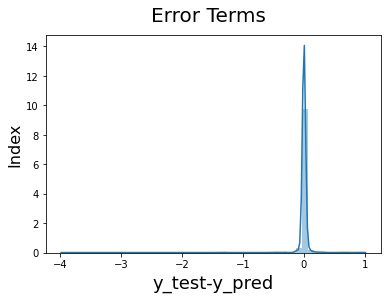

In [374]:
fig = plt.figure()
sns.distplot((y_test-RF_pred),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label
plt.show()

#### Residuals of Model

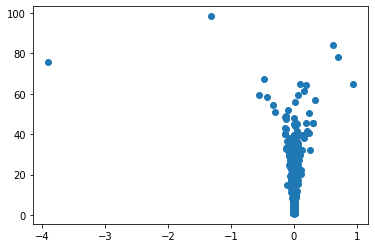

In [375]:
Residuals = y_test - RF_pred

plt.scatter(Residuals,RF_pred)

plt.show()

#### Difference between Actual and Predicted Values

In [376]:
y2_test=np.array(y_test)

predictedPrice = pd.DataFrame(RF_pred, columns=['Predicted Price']) # Create new dataframe of column'Predicted Price'
actualPrice = pd.DataFrame(y2_test, columns=['Actual Price'])
actualPrice = actualPrice.reset_index(drop=True) # Drop the index so that we can concat it, to create new dataframe
df_actual_vs_predicted = pd.concat([actualPrice,predictedPrice],axis =1)
df_actual_vs_predicted.T

,0,1,2,3,4,5,6,7,8,9,...,1721,1722,1723,1724,1725,1726,1727,1728,1729,1730
Actual Price,28.000000,10.5,8.9,8.100000,4.25,5.840000,2.25,2.01,7.09,6.0,...,1.990000,2.8,32.900000,6.8,7.5,4.75,3.0,3.75,5.480,7.850000
Predicted Price,27.996429,10.5,8.9,8.101429,4.25,5.840714,2.25,2.00,7.09,6.0,...,1.990714,2.8,33.024286,6.8,7.5,4.75,3.0,3.75,5.485,7.842857


### Gradiant Boosting Regressor

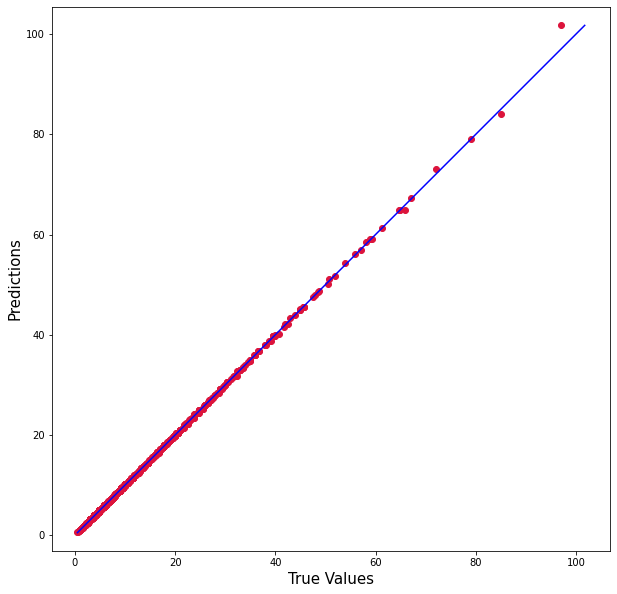

In [377]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, GB_pred, c='crimson')

p1 = max(max(GB_pred), max(y_test))
p2 = min(min(GB_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [378]:
GB_Error=metrics.mean_absolute_error(y_test, GB_pred)
GB_R2Score= metrics.r2_score(y_true=y_test, y_pred=GB_pred)

print("Mean Absolute Error is : ",GB_Error,"\nR2 Score of Gradiant Boosting Regression: ",GB_R2Score)



Mean Absolute Error is :  0.05252951773761118 
R2 Score of Gradiant Boosting Regression:  0.9998060366356134


#### Plot Error Terms / Rate of Choosed Model

/home/admins/.local/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


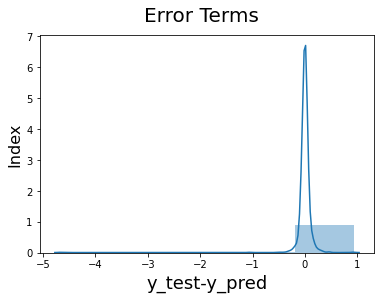

In [379]:
fig = plt.figure()
sns.distplot((y_test-GB_pred),bins=5)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label
plt.show()

#### Residuals of Model

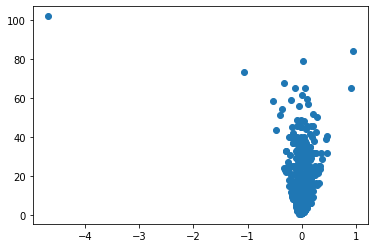

In [380]:
Residuals = y_test - GB_pred

plt.scatter(Residuals,GB_pred)

plt.show()

#### Difference between Actual and Predicted Values

In [381]:
y2_test=np.array(y_test)

predictedPrice = pd.DataFrame(GB_pred, columns=['Predicted Price']) # Create new dataframe of column'Predicted Price'
actualPrice = pd.DataFrame(y2_test, columns=['Actual Price'])
actualPrice = actualPrice.reset_index(drop=True) # Drop the index so that we can concat it, to create new dataframe
df_actual_vs_predicted = pd.concat([actualPrice,predictedPrice],axis =1)
df_actual_vs_predicted.T

,0,1,2,3,4,5,6,7,8,9,...,1721,1722,1723,1724,1725,1726,1727,1728,1729,1730
Actual Price,28.000000,10.500000,8.900000,8.100000,4.250000,5.840000,2.250000,2.010000,7.09000,6.000000,...,1.990000,2.800000,32.90000,6.800000,7.500000,4.750000,3.000000,3.750000,5.480000,7.850000
Predicted Price,28.046257,10.396171,8.887492,8.238193,4.294849,5.886338,2.253299,1.999334,7.09688,6.009157,...,1.994806,2.799182,32.97919,6.789344,7.464838,4.717014,2.999536,3.747366,5.477931,7.919644


#### VOTER of All above Regressors

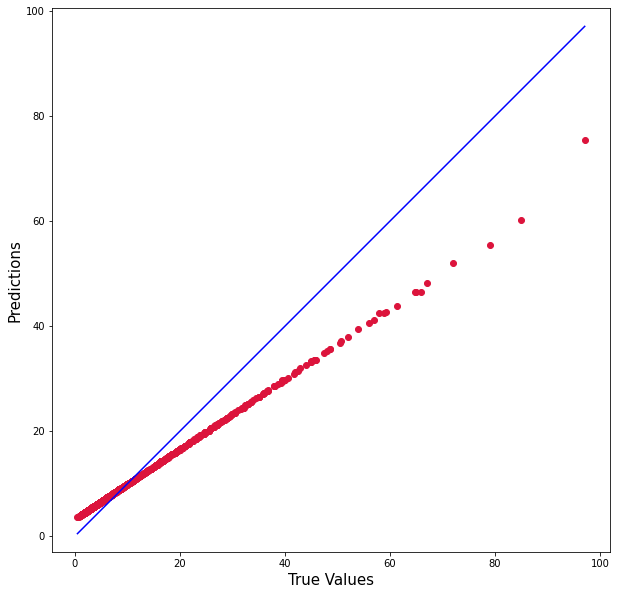

In [382]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, Voter_pred, c='crimson')


p1 = max(max(Voter_pred), max(y_test))
p2 = min(min(Voter_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [383]:
Voter_Error=metrics.mean_absolute_error(y_test, Voter_pred)
Voter_R2Score= metrics.r2_score(y_true=y_test, y_pred=Voter_pred)

print("Mean Absolute Error is : ",Voter_Error,"\nR2 Score of VOTER Regressor: ",Voter_R2Score)

Mean Absolute Error is :  2.283344227960583 
R2 Score of VOTER Regressor:  0.8909823619517523


#### Plot Error Terms / Rate of Choosed Model

/home/admins/.local/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


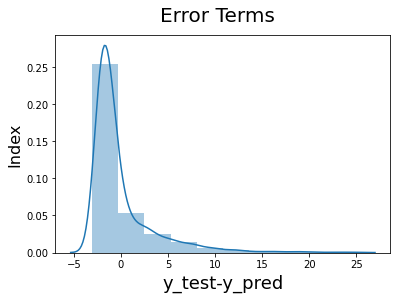

In [384]:
fig = plt.figure()
sns.distplot((y_test-Voter_pred),bins=10)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label
plt.show()

#### Residuals of Model

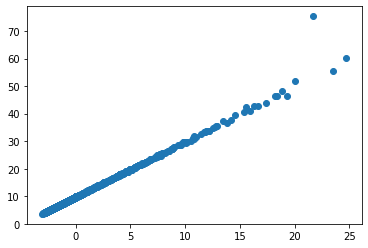

In [385]:
Residuals = y_test - Voter_pred

plt.scatter(Residuals,Voter_pred)

plt.show()

#### Difference between Actual and Predicted Values

In [386]:
y2_test=np.array(y_test)

predictedPrice = pd.DataFrame(Voter_pred, columns=['Predicted Price']) # Create new dataframe of column'Predicted Price'
actualPrice = pd.DataFrame(y2_test, columns=['Actual Price'])
actualPrice = actualPrice.reset_index(drop=True) # Drop the index so that we can concat it, to create new dataframe
df_actual_vs_predicted = pd.concat([actualPrice,predictedPrice],axis =1)
df_actual_vs_predicted.T

,0,1,2,3,4,5,6,7,8,9,...,1721,1722,1723,1724,1725,1726,1727,1728,1729,1730
Actual Price,28.000000,10.50000,8.900000,8.100000,4.250000,5.840000,2.250000,2.010000,7.090000,6.000000,...,1.99000,2.800000,32.900000,6.800000,7.500000,4.750000,3.000000,3.750000,5.480000,7.850000
Predicted Price,21.911115,10.19252,9.160062,8.682613,6.080131,7.144429,4.731609,4.563621,7.959836,7.232077,...,4.55775,5.096589,25.244994,7.759616,8.217325,6.384302,5.230279,5.729556,6.886241,8.484108


From The above analysis we can clearly see that gradiant boosting regressor algorithm works perfectly on our data with all the feature engineering and feature selection methods used above. Other algorithms also behaves pretty well to predict the price of automobile.

### Compare Pre and Post Model Analysis

In [395]:
LR_analysis = [201.2245 , 0.7846]
RF_analysis = [676.2101 , 0.8635]
GB_analysis = [909.8778 , 0.7904]
Voter_analysis = [187.4697 , 0.8255]

pre_analysis = pd.DataFrame(columns=['Mean Absolute Eroor','R2 Score']
                            , index=['Linear Regression (Ridge)','Random Forest','Gradiant Booster','VOTER of above'])
pre_analysis.loc['Linear Regression (Ridge)'] = LR_analysis
pre_analysis.loc['Random Forest'] = RF_analysis
pre_analysis.loc['Gradiant Booster'] = GB_analysis
pre_analysis.loc['VOTER of above'] = Voter_analysis



In [396]:
LR_analysis1 = [0.0000007 , 0.9999]
RF_analysis1 = [0.0145 , 0.9998]
GB_analysis1 = [0.0528 , 0.9998]
Voter_analysis1 = [2.2833 , 0.8909]

post_analysis = pd.DataFrame(columns=['Mean Absolute Eroor','R2 Score']
                            , index=['Linear Regression (Ridge)','Random Forest','Gradiant Booster','VOTER of above'])
post_analysis.loc['Linear Regression (Ridge)'] = LR_analysis1
post_analysis.loc['Random Forest'] = RF_analysis1
post_analysis.loc['Gradiant Booster'] = GB_analysis1
post_analysis.loc['VOTER of above'] = Voter_analysis1



In [397]:
print ("Models Evaluation on Selected Parameter")

print ("Pre- Model Analysis")
print ("Without Any Feature Engineering and Selection")
pre_analysis




Models Evaluation on Selected Parameter
Pre- Model Analysis
Without Any Feature Engineering and Selection


,Mean Absolute Eroor,R2 Score
Linear Regression (Ridge),201.225,0.7846
Random Forest,676.21,0.8635
Gradiant Booster,909.878,0.7904
VOTER of above,187.47,0.8255


In [398]:
print ("Post- Model Analysis")
print ("With All above techniques of")
print("1- Feature Engineering")
print("2- Feature Selection")
post_analysis


Post- Model Analysis
With All above techniques of
1- Feature Engineering
2- Feature Selection


,Mean Absolute Eroor,R2 Score
Linear Regression (Ridge),7e-07,0.9999
Random Forest,0.0145,0.9998
Gradiant Booster,0.0528,0.9998
VOTER of above,2.2833,0.8909


We can clearly see from the comparison tables shown above that after applying all the feature engineering and feature selection techniques every model improved its performance in every aspect of model evaluation. Above table differenciate only the error and R2 score of pre-model and post-model analysis but we can also compare the results of this final notebook for each model with the rough work notebook in which we analyzed the model(trained without any feature engineering and selction) with more mterics. We will find out that post model analysis shows significantly high results as compare to pre-model analysis.

### Conclusion

The dataset is made out of AutoMobiles car sale listings. Automobile is the largest digital car marketplace in the United Kingdom and Ireland. In the first step, data loaded .Then the basic inspection and indexing of data was performed for ease in querrying. key information about variable and fields was acquired in the data undersatnding and exploration stage which was really helpful in making decision regarding the variable taht wil be used in the analysis. Necessary data cleaning and filtertion was performed which includes filling null values, removing outliers or extereme values and filtering of data as per needs in the analysis. 


The price of a car is affected by the year of registration and mileage across all fuel types and the top make and model, according to analysis of car prices with the year of registration and mileage across all fuel types and the top make and model. Because some data points in the same year have different prices, the year of registration is not consistent. The majority of the points in the mileage portion, on the other hand, are closer to the line of best fit. It shows that by considering a car's mileage, we can more precisely anticipate the price of the vehicle.

After Engineering all the necessary features we select the features for final model analysis. We train four different types of models on our final features

#### . Linear Regression (ridge)
#### . Random Forest Regressor
#### . Gradiant Boosting Regressor
#### . VOTER Regressor of all of the above

After Pre and Post Model Analysis we figured out that our applied following methods of feature engineering and selection boost the results significantly for each of the above mentioned models. All selected Regressor algorithm works better than rest of the regression techniques on our specific problem set.
